In [297]:
import numpy as np
import cv2

# WRAP PRESPECTIVE FUNCTION

In [286]:
def orderpoints(pts):
    #points in the order of topleft-topright-bottomright-bottomleft
    rect = np.zeros((4,2),dtype="float32")
    sum = np.sum(pts,axis=1)
    rect[0] = pts[np.argmin(sum)]
    rect[2] = pts[np.argmax(sum)]
    diff = np.diff(pts,axis=1)
    rect[3] = pts[np.argmax(diff)]
    rect[1] = pts[np.argmin(diff)]
    return rect

In [287]:
def fourptstransform(image,pts):
    rect = orderpoints(pts)
    
    (tl,tr,br,bl) = rect
    
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    
    return warped

# TESTING THE WRAP PERSPECTIVE

In [289]:
image = cv2.imread('frame.png')

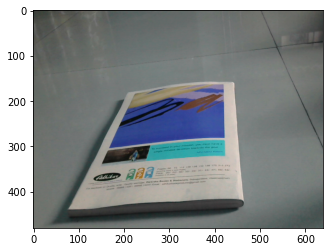

In [290]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [291]:
pts = np.array([(70,450),(470,440),(440,170),(200,180)],dtype="float32")

In [292]:
pts

array([[ 70., 450.],
       [470., 440.],
       [440., 170.],
       [200., 180.]], dtype=float32)

In [293]:
wrap = fourptstransform(image,pts)

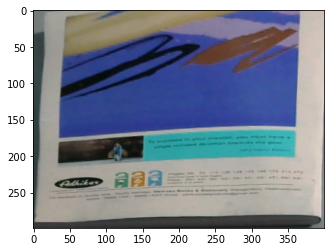

In [294]:
plt.imshow(wrap)

Automate the process of giving the corner images, for that we can apply edge and corner detection methods

# EDGE DETECTION

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [271]:
image = cv2.imread('receipt-scanned.jpg')

In [272]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [273]:
blur = cv2.GaussianBlur(gray,(5,5),0)

In [274]:
edges = cv2.Canny(blur,75,200)

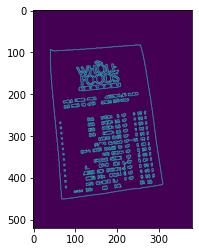

In [275]:
plt.imshow(edges)

In [276]:
image_copy = image.copy()

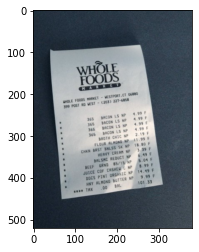

In [277]:
plt.imshow(image_copy)

In [278]:
edges_copy = edges.copy()

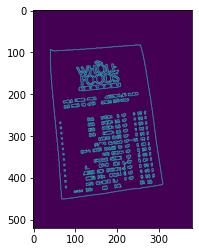

In [279]:
plt.imshow(edges_copy)

In [281]:
cnt,h = cv2.findContours(edges_copy,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [283]:
for c in cnt:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break

In [295]:
screenCnt = np.float32(screenCnt)

In [304]:
screenCnt =  screenCnt.ravel().reshape((4,2))

In [305]:
screenCnt

array([[256.,  83.],
       [ 41.,  94.],
       [ 68., 450.],
       [309., 416.]], dtype=float32)

In [306]:
wrap = fourptstransform(gray,screenCnt)

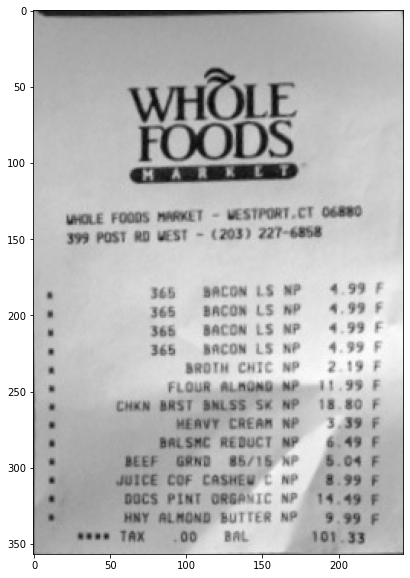

In [329]:
plt.figure(figsize=(10,10))
plt.imshow(wrap,cmap='gray')

In [341]:
ret,thres = cv2.threshold(wrap,140,255,cv2.THRESH_TOZERO)

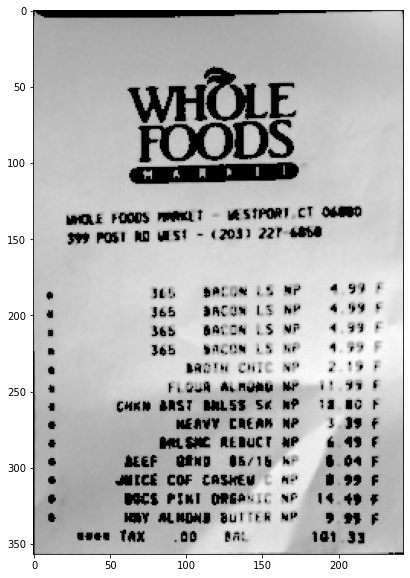

In [342]:
plt.figure(figsize=(10,10))
plt.imshow(thres,cmap='gray')